In [75]:
import pandas as pd
from pandas import json_normalize


In [2]:
import numpy as np

In [38]:
df=pd.read_csv("/content/food_rechanged.csv")

In [39]:
df.head(5)

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2,3,3,1,1,5,5,1,2,1,5
1,3,2,2,4,1,4,4,1,4,1,4
2,1,2,3,5,2,5,6,2,3,2,5
3,2,2,3,5,3,4,6,1,2,2,3
4,1,2,2,4,1,4,6,1,4,1,4


In [40]:
import seaborn as sns

In [41]:
import matplotlib.pyplot as plt


In [42]:
file_path = "/content/food_rechanged.csv"

In [43]:
data = pd.read_csv(file_path)

In [44]:
sns.set(style="whitegrid")

In [45]:
plt.figure(figsize=(250, 100))

<Figure size 25000x10000 with 0 Axes>

<Figure size 25000x10000 with 0 Axes>

In [46]:
variables=['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']

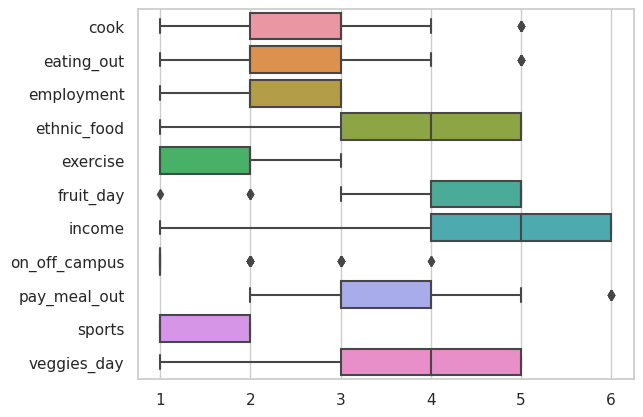

In [47]:
sns.boxplot(data=df[variables],orient='h')
plt.show()

In [48]:
from sklearn.cluster import KMeans

In [50]:
wcss = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(df)
  wcss.append(kmeans.inertia_)

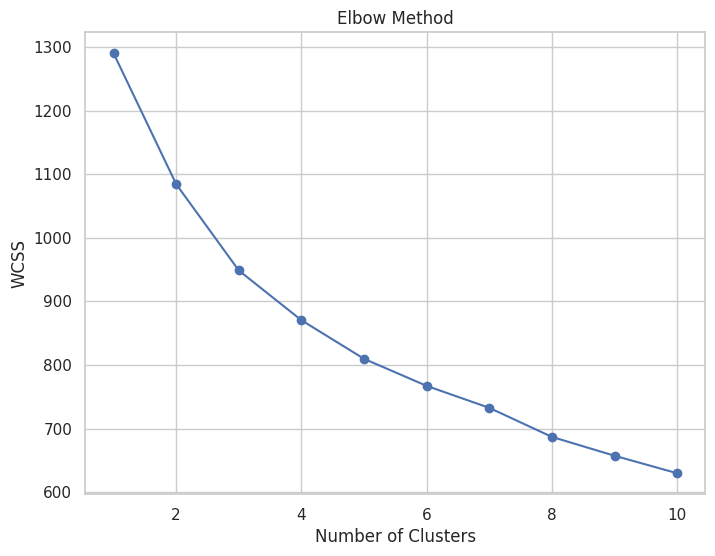

In [51]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
from tables.leaf import limit_es
import requests
from datetime import datetime

# Foursquare credentials
CLIENT_ID = 'YOUR_CLIENT_ID'
CLIENT_SECRET = 'YOUR_CLIENT_SECRET'

# Coordinates of the point you want to search around (example coordinates in Bangalore)
LATITUDE = 13.133521
LONGITUDE = 77.567135

# Get current date in YYYYMMDD format
current_date = datetime.today().strftime('%Y%m%d')

# API endpoint
API_URL = 'https://api.foursquare.com/v2/venues/explore'

# Parameters for the API request
params = {
    'client_id': 'KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF',
    'client_secret': 'KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR',
    'v': current_date,  # Use the current date in YYYYMMDD format
    'll': f'{LATITUDE},{LONGITUDE}',  # Latitude and Longitude of the center point
    'section': 'residential',  # Specify the section for residential places
    'limit': 500  # Limit the number of results
}
response = requests.get(API_URL, params=params)
data = response.json()

# Process and print the results
if 'response' in data and 'groups' in data['response']:
    residential_places = data['response']['groups'][0]['items']
    for place in residential_places:
        name = place['venue']['name']
        address = place['venue']['location'].get('address', 'Address not available')
        print(f"Name: {name}, Address: {address}")

Name: Kanti Sweets, Address: #293, SMK complex
Name: Decathlon, Address: Address not available
Name: Big Straw, Address: Century Corbel Commercial, Sahakarnagar Main Road
Name: Sunburn Arena I AM Hardwell, Address: Supernova Convention Centre
Name: Bhartiya City, Address: 32/1, Thanisandra Main Rd., Chokkanahapalli Hegde Nagar
Name: Inox Garuda, YNT, Address: Garuda Mall, Yelahanka
Name: Cafe Coffee Day, Address: Yelahanka New town,
Name: The Windflower Resort and Spa, Address: Windflower Prakruthi, Plot 12A
Name: Freskka, Address: Sahakara Nagar
Name: Swensen's, Address: Address not available
Name: More Mega Store, Address: Sahakaranagar
Name: Embassy International Riding School, Address: Address not available
Name: Cafe Coffee Day, Address: Next to Navachetana hospital
Name: Baskin-Robbins, Address: Address not available
Name: Sanjay Dhaba, Address: Bellary Rd
Name: Jus'Trufs Chocolate Shop and Cafe, Address: Jus'Trufs, Jakkur Road, Jakkur
Name: Cafe Potenza, Address: Address not ava

In [72]:
import requests
from datetime import datetime

def get_residential_places(client_id, client_secret, latitude, longitude, radius=1000, limit=50):
    current_date = datetime.today().strftime('%Y%m%d')
    API_URL = 'https://api.foursquare.com/v2/venues/explore'
    params = {
        'client_id': client_id,
        'client_secret': client_secret,
        'v': current_date,
        'll': f'{latitude},{longitude}',
        'radius': radius,
        'section': 'residential',
        'limit': limit
    }
    response = requests.get(API_URL, params=params)
    data = response.json()
    if 'response' in data and 'groups' in data['response']:
        residential_places = data['response']['groups'][0]['items']
        return residential_places
    else:
        return []

# Foursquare credentials
CLIENT_ID = 'KTCJJ2YZ2143QHEZ2JAQS4FJIO5DLSDO0YN4YBXPMI5NKTEF'
CLIENT_SECRET = 'KNG2LO22BPLHN1E3OAHWLYQ5PQBN14XYZMEMAS0CPJEJKOTR'

# Coordinates of the point you want to search around (example coordinates in Bangalore)
LATITUDE = 13.133521
LONGITUDE = 77.567135

# Call the function to get residential places
residential_results = get_residential_places(CLIENT_ID, CLIENT_SECRET, LATITUDE, LONGITUDE)

# Store the results in a variable
residential_places_list = []
for place in residential_results:
    name = place['venue']['name']
    address = place['venue']['location'].get('address', 'Address not available')
    residential_places_list.append({'Name': name, 'Address': address})

In [73]:
residential_results


[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '517cde57e4b0efc90515ccdf',
   'name': 'Akshaya Family Restaurant',
   'location': {'lat': 13.13674,
    'lng': 77.569436,
    'labeledLatLngs': [{'label': 'display',
      'lat': 13.13674,
      'lng': 77.569436}],
    'distance': 436,
    'cc': 'IN',
    'country': 'India',
    'formattedAddress': ['India']},
   'categories': [{'id': '4bf58dd8d48988d10f941735',
     'name': 'Indian Restaurant',
     'pluralName': 'Indian Restaurants',
     'shortName': 'Indian',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_',
      'suffix': '.png'},
     'primary': True}],
   'photos': {'count': 0, 'groups': []},
   'createdAt': 1367137879},
  'referralId': 'e-0-517cde57e4b0efc90515ccdf-0'},
 {'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName'

In [79]:
venues = residential_results

# Normalize the data using json_normalize
nearby_venues = json_normalize(venues)
table_str = nearby_venues.to_string(index=False)
print(table_str)

                    referralId  reasons.count                                                                                     reasons.items                 venue.id                venue.name  venue.location.lat  venue.location.lng                                               venue.location.labeledLatLngs  venue.location.distance venue.location.cc venue.location.country                                                   venue.location.formattedAddress                                                                                                                                                                                                                                                                                    venue.categories  venue.photos.count venue.photos.groups  venue.createdAt venue.location.address venue.location.postalCode venue.location.city venue.location.state venue.venuePage.id venue.location.crossStreet
e-0-517cde57e4b0efc90515ccdf-0              0 [{'summary

In [81]:
import folium
from sklearn.cluster import KMeans
selected_columns = ['venue.location.lat', 'venue.location.lng']
X = nearby_venues[selected_columns]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
nearby_venues['cluster'] = kmeans.fit_predict(X)

# Create a map
location_map = folium.Map(location=[LATITUDE, LONGITUDE], zoom_start=15)

# Add markers for each cluster
colors = ['red', 'blue', 'green']
for idx, row in nearby_venues.iterrows():
    cluster = row['cluster']
    folium.CircleMarker(
        location=[row['venue.location.lat'], row['venue.location.lng']],
        radius=5,
        color=colors[cluster],
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7
    ).add_to(location_map)

# Display the map
location_map.save('location_clusters_map.html')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [88]:
from IPython.display import IFrame

# Specify the path to the uploaded HTML file
html_file_path = '/content/location_clusters_map.html'

# Display the embedded map using an IFrame
IFrame(src=html_file_path, width='100%', height='500px')
